In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_csv= "data/city_data.csv"
ride_data_csv = "data/ride_data.csv"

#make csv files df's
city_data = pd.read_csv(city_data_csv)
ride_data= pd.read_csv(ride_data_csv)

#merge df's above
ride_share_df = pd.merge(ride_data, city_data, how="inner", on= "city")
ride_share_df = ride_share_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
ride_share_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


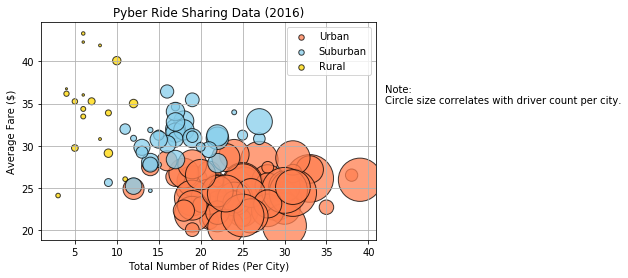

In [2]:
#split the ride share data into the 3 city type groups
city_type = ride_share_df.groupby("type")
urban_type = city_type.get_group("Urban")
suburban_type = city_type.get_group("Suburban")
rural_type = city_type.get_group("Rural")

#get the average fare, total rides and total drivers for each city type
urban_avg_fare = urban_type.groupby("city")["fare"].mean()
urban_total_rides = urban_type.groupby("city")["ride_id"].count()
urban_total_drivers = urban_type.groupby("city")["driver_count"].sum()

suburban_avg_fare = suburban_type.groupby("city")["fare"].mean()
suburban_total_rides = suburban_type.groupby("city")["ride_id"].count()
suburban_total_drivers = suburban_type.groupby("city")["driver_count"].sum()

rural_avg_fare = rural_type.groupby("city")["fare"].mean()
rural_total_rides = rural_type.groupby("city")["ride_id"].count()
rural_total_drivers = rural_type.groupby("city")["driver_count"].sum()


#create a scatter plot for each of the city types
urban = plt.scatter(urban_total_rides, urban_avg_fare, urban_total_drivers, color = "coral", alpha = 0.75, edgecolor = "black", label = "Urban")
suburban = plt.scatter(suburban_total_rides, suburban_avg_fare, suburban_total_drivers, color = "skyblue", alpha = 0.75, edgecolor = "black", label = "Suburban")
rural = plt.scatter(rural_total_rides, rural_avg_fare, rural_total_drivers, color = "gold", alpha = 0.75, edgecolor = "black", label = "Rural")

#create labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

#create a legend
bubble_legend = plt.legend(loc = "upper right", scatterpoints = 1, fontsize = 10)
bubble_legend.legendHandles[0]._sizes = [30]
bubble_legend.legendHandles[1]._sizes = [30]
bubble_legend.legendHandles[2]._sizes = [30]

#add a text label using x, y coordinates
plt.text(42,35,s = "Note:\nCircle size correlates with driver count per city.")

plt.savefig("../Images/rideshareanalysis2016.png")
plt.show()





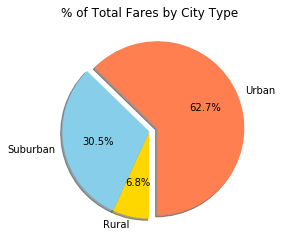

In [3]:
#find total sum of fares for all city types
total_fare_sum = ride_share_df["fare"].sum()

#find the urban sum of fares/percent of total fares
urban_fare_sum = urban_type["fare"].sum()
urban_fare_percent = urban_fare_sum / total_fare_sum
urban_fare_percent

#find the suburban sum of fares/percent of total fares
suburban_fare_sum = suburban_type["fare"].sum()
suburban_fare_percent = suburban_fare_sum / total_fare_sum
suburban_fare_percent

#find the rural sum of fares/percent of total fares
rural_fare_sum = rural_type["fare"].sum()
rural_fare_percent = rural_fare_sum / total_fare_sum
rural_fare_percent

#create pie chart
city_types = ["Urban", "Suburban", "Rural"]
fare_percent = [urban_fare_percent, suburban_fare_percent, rural_fare_percent]
colors = ["coral", "skyblue", "gold"]
explode = [.1, 0, 0]

plt.pie(fare_percent, explode=explode, colors=colors, labels=city_types, shadow=True, autopct="%1.1f%%", startangle = 270)
plt.title("% of Total Fares by City Type")

plt.savefig("../Images/totalfaresanalysis.png")
plt.show()

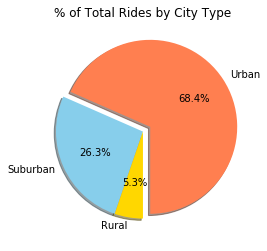

In [4]:
#find total count of rides for all city types
total_ride_count = ride_share_df["ride_id"].count()

#find the urban count of rides/percent of total rides
urban_ride_total = urban_type["ride_id"].count()
urban_ride_percent = urban_ride_total / total_ride_count

#find the suburban count of rides/percent of total rides
suburban_ride_total = suburban_type["ride_id"].count()
suburban_ride_percent = suburban_ride_total / total_ride_count

#find the rural count of rides/percent of total 
rural_ride_total = rural_type["ride_id"].count()
rural_ride_percent = rural_ride_total / total_ride_count

#create pie chart
city_types = ["Urban", "Suburban", "Rural"]
ride_percent = [urban_ride_percent, suburban_ride_percent, rural_ride_percent]
colors = ["coral", "skyblue", "gold"]
explode = [.1, 0, 0]

plt.pie(ride_percent, explode=explode, colors=colors, labels=city_types, shadow=True, autopct="%1.1f%%", startangle = 270)
plt.title("% of Total Rides by City Type")

plt.savefig("../Images/totalridesanalysis.png")
plt.show()


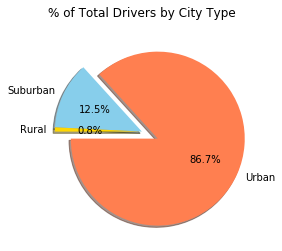

In [5]:
#find total sum of drivers for all city types
total_driver_count = ride_share_df["driver_count"].sum()

#find the urban sum of drivers/percent of total rides
urban_driver_total = urban_type["driver_count"].sum()
urban_driver_percent = urban_driver_total / total_driver_count

#find the suburban sum of drivers/percent of total rides
suburban_driver_total = suburban_type["driver_count"].sum()
suburban_driver_percent = suburban_driver_total / total_driver_count

#find the rural sum of drivers/percent of total 
rural_driver_total = rural_type["driver_count"].sum()
rural_driver_percent = rural_driver_total / total_driver_count

#create pie chart
city_types = ["Urban", "Suburban", "Rural"]
driver_percent = [urban_driver_percent, suburban_driver_percent, rural_driver_percent]
colors = ["coral", "skyblue", "gold"]
explode = [.2, 0, 0]

plt.pie(driver_percent, explode=explode, colors=colors, labels=city_types, shadow=True, autopct="%1.1f%%", startangle = 180)
plt.title("% of Total Drivers by City Type")

plt.savefig("../Images/totaldriversanalysis.png")
plt.show()

